In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import HTML

In [34]:
def forward_euler_time_traffic_with_diffusion(dt, dx, u0, a, b, V_infty, u_infty, epsilon, Tf):
    """
    dt: time step 
    dx: spatial step
    u0: ndarray containing the initial condition
    a: dirichlet on the LHS; expects lambda
    b: dirichlet on the RHS; expects lambda
    epsilon: coefficient on diffusion term
    """
    T = np.arange(0, Tf+dt, dt)
    a = a(T)
    b = b(T)
    
    U = np.zeros((len(T), len(u0)))
    U[0, 0] = a[0]
    U[:, 0] = a
    U[0, -1] = b[0]
    U[0] = u0

    
    for i in range(0, len(U)-1):
        # Points not along the boundary
        U[i+1, 1:-1] = U[i, 1:-1] + V_infty*dt*(epsilon/dx**2*(U[i, 2:] - 2*U[i, 1:-1] + np.roll(U[i, :-2], 1)) 
                                         - 1/2/dx*(1 - 2*U[i, 1:-1]/u_infty)*(U[i, 2:] - U[i, :-2]))

    return U

In [35]:
dt = .0005
dx = .01
domain = np.arange(0, 2+dx, dx)
u_infty = 1
u0 = np.zeros_like(domain)
# f = lambda x: u_infty/2 * np.exp(-10*x) 
f = lambda x: u_infty * np.exp(-10*x) 
u0 = f(domain)

a = lambda x: u_infty*np.exp(-2*x)
b = lambda x: 0*x
V_infty = 1
epsilon = 0.1
Tf = 2

U = forward_euler_time_traffic_with_diffusion(dt, dx, u0, a, b, V_infty, u_infty, epsilon, Tf)
U


fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim((0,1))
ax.set_ylim((0,1.1))
sol, = plt.plot([],[])
def update(i):
    sol.set_data(domain, U[i])
    return sol
ani = animation.FuncAnimation(fig, update, 500, interval=10)
plt.close()
HTML(ani.to_html5_video())

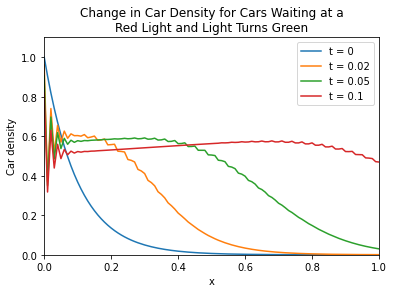

In [53]:
fig2 = plt.figure()
plt.plot(domain, U[0], label='t = 0')
plt.plot(domain, U[int(0.02/dt)], label='t = 0.02')
plt.plot(domain, U[int(0.05/dt)], label='t = 0.05')
plt.plot(domain, U[int(0.1/dt)], label='t = 0.1')
plt.legend()
plt.xlim([0,1])
plt.ylim([0,1.1])
plt.xlabel('x')
plt.ylabel('Car density')
plt.title('Change in Car Density for Cars Waiting at a\nRed Light and Light Turns Green')
plt.savefig('figures/Red_to_Green.png')

In [22]:
def forward_euler_red_light_with_diffusion(dt, dx, u0, V_infty, u_infty, epsilon, Tf):
    """
    dt: time step 
    dx: spatial step
    u0: ndarray containing the initial condition
    a: dirichlet on the LHS; expects lambda
    b: dirichlet on the RHS; expects lambda
    epsilon: coefficient on diffusion term
    """
    T = np.arange(0, Tf+dt, dt)
    
    U = np.zeros((len(T), len(u0)))
    U[0] = u0

    
    # Points not along the boundary
    for i in range(0, len(U)-1):
        U[i+1, 1:-1] = U[i, 1:-1] + V_infty*dt*(epsilon/dx**2*(U[i, 2:] - 2*U[i, 1:-1] + np.roll(U[i, :-2], 1)) 
                                         - 1/2/dx*(1 - 2*U[i, 1:-1]/u_infty)*(U[i, 2:] - U[i, :-2]))
        
        U[i+1, 0] = U[i, 0] + V_infty*dt*(epsilon/dx**2*(U[i, 2:] - 2*U[i, 1:-1] + np.roll(U[i, :-2], 1)) 
                                         - 1/2/dx*(1 - 2*U[i, 1:-1]/u_infty)*(U[i, 2:] - U[i, :-2]))
        
        # Consider boundaries
        U[i+1, -1] = U[i, -1] + 2*V_infty*epsilon*dt/(dx**2)*(U[i, -2] - U[i, -1])

    return U

In [33]:
dt = .0001
dx = .1
domain = np.arange(0, 1+dx, dx)
u_infty = 1
u0 = 0.25*u_infty+0.75*u_infty*np.exp(10*(domain - 1))

a = lambda x: u_infty*0.25*np.ones_like(x)
V_infty = 1
epsilon = 0.1
Tf = 2

U = forward_euler_red_light_with_diffusion(dt, dx, u0, a, V_infty, u_infty, epsilon, Tf)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim((0,1))
ax.set_ylim((0,1.1))
sol, = plt.plot([],[])
def update(i):
    sol.set_data(domain, U[i])
    return sol
ani = animation.FuncAnimation(fig, update, 500, interval=10)
plt.close()
HTML(ani.to_html5_video())